# DBSCAN

In [129]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

<h1 align=center> Weather Station Clustering using DBSCAN & scikit-learn </h1>
<hr>

DBSCAN is especially very good for tasks like class identification in a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example cluster the location of weather stations in Canada.
\<Click 1>
DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

Let's start playing with the data. We will be working according to the following workflow: </font>

1.  Loading data

*   Overview data
*   Data cleaning
*   Data selection
*   Clusteing


### About the dataset

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>


### 1- Load the dataset

We will import the .csv then we creates the columns for year, month and day.


In [130]:
import csv
import pandas as pd
import numpy as np

filename='weather-stations20140101-20141231.csv'

#Read csv
df = pd.read_csv(filename)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


### 2-Cleaning

Let's remove rows that don't have any value in the **Tm** field.


In [142]:
df = df[pd.notnull(df["Tm"])]
df = df.reset_index(drop=True)

### 4-Visualization

Visualization of stations on map using basemap package. The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.

Please notice that the size of each data points represents the average of maximum temperature for each station in a year.


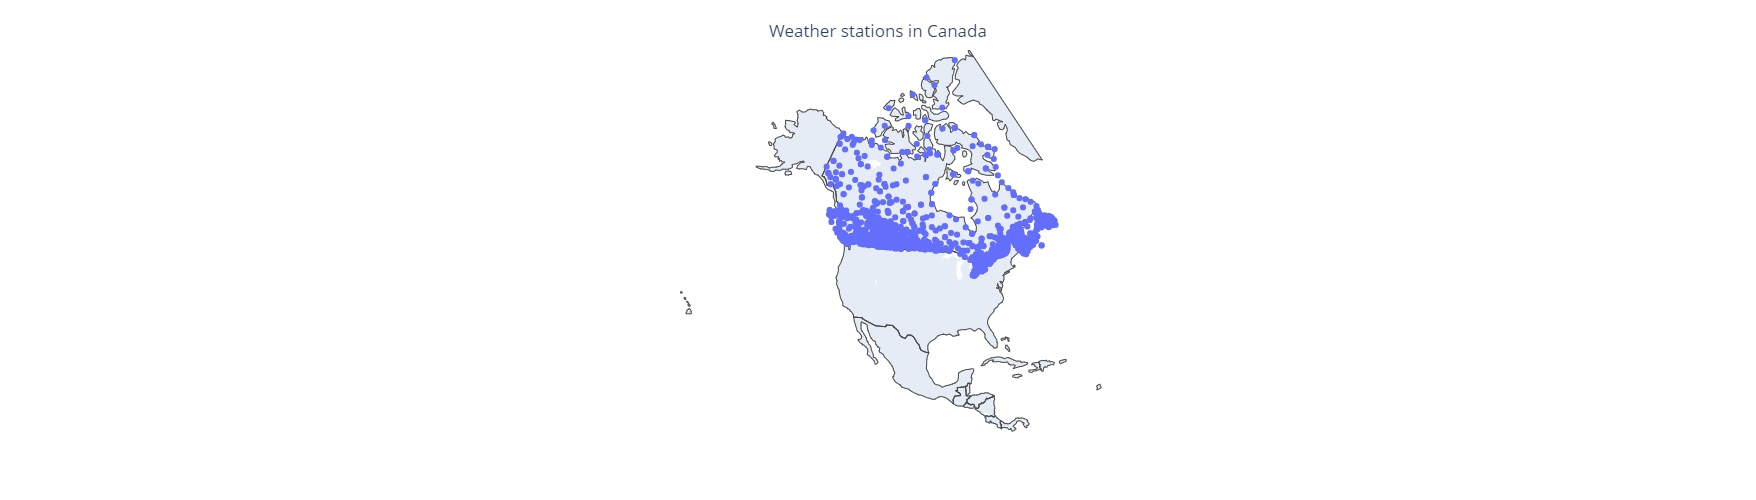

In [132]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(df, lat = 'Lat', lon = 'Long')

fig.update_layout(width=800, height=500,
                  margin=dict(r=0, b=20, l=0, t=50),
                  title = {
                    'text': "Weather stations in Canada ",
                     'y':0.95,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top' },
                 geo_scope='north america'
                 )

fig.show()

### 5- Clustering of stations based on their location i.e. Lat & Lon

**DBSCAN** form sklearn library can run DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them.

* First we look for the epsilon value


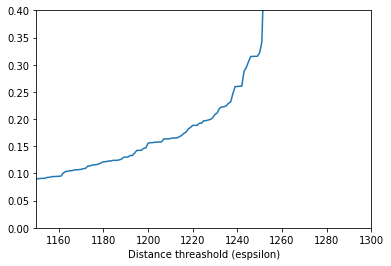

In [133]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

X = df[['Lat','Long']]
X = StandardScaler().fit_transform(X)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim(1150,1300)
plt.ylim(0,0.4)
plt.xlabel('Distances')
plt.xlabel('Distance threashold (espsilon)')
plt.plot(distances)
plt.show()

In [134]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

dimensions = ['Lat','Long']
dimensions_string = ", ".join(dimensions)
Clus_dataSet = df[dimensions]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

### 6- Visualization of clusters based on location

Now, we can visualize the clusters using basemap:


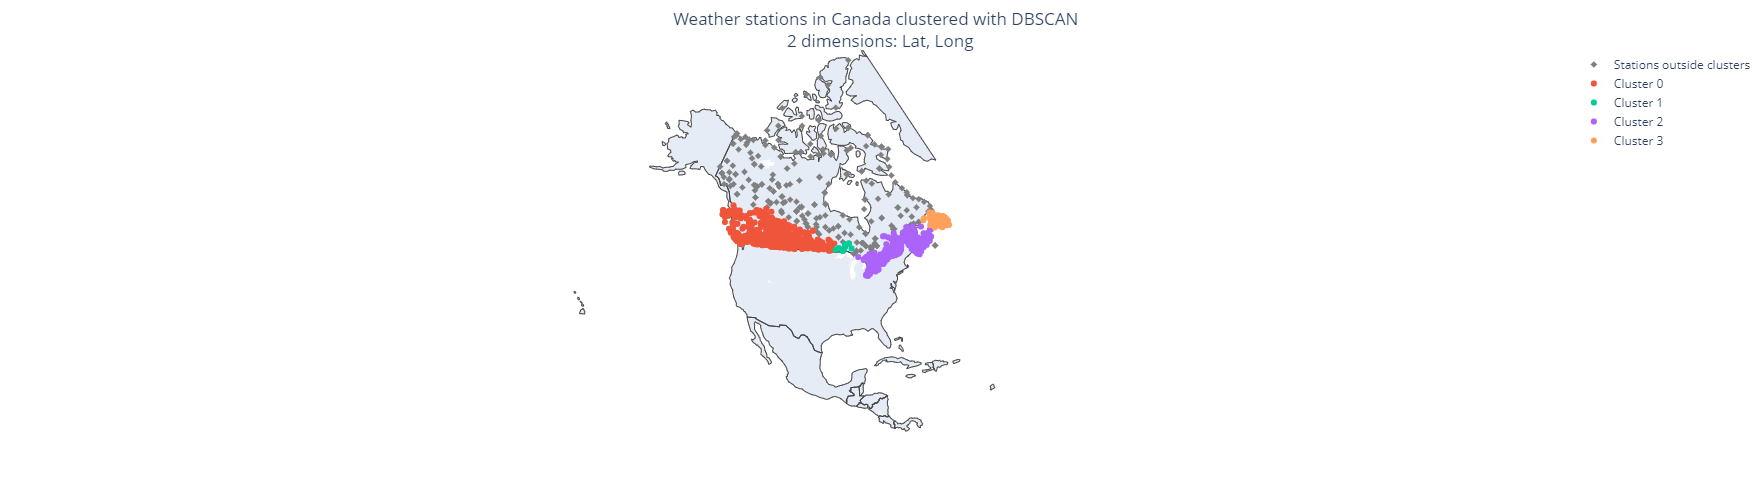

In [135]:
import plotly.graph_objects as go
import pandas as pd

df = df.sort_values('Clus_Db')

fig = go.Figure()

for C in list(df.Clus_Db.unique()):
    # Adding trace for outlier
    if C==-1:
        fig.add_trace(go.Scattergeo(
                        lat = df[df.Clus_Db == C]['Lat'],
                        lon = df[df.Clus_Db == C]['Long'],
                        name = 'Stations outside clusters',
                        marker = {'color' : 'grey','size': 5,'symbol': 'diamond'}
                                    )
                        )
        
    # Adding trace for clusters
    else:
        fig.add_trace(go.Scattergeo(
                        lat = df[df.Clus_Db == C]['Lat'],
                        lon = df[df.Clus_Db == C]['Long'],
                        name = 'Cluster ' + str(C))
                     )
    
fig.update_layout(width=800, height=500,
                  margin=dict(r=0, b=20, l=0, t=50),
                  title = {
                    'text': "Weather stations in Canada clustered with DBSCAN <br> {} dimensions: {}".format(len(dimensions),dimensions_string),
                     'y':0.95,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top' },
                 geo_scope='north america'
                 )

fig.show()

### 7- Clustering of stations based on their location, mean, max, and min Temperature

In this section we re-run DBSCAN, but this time on a 5-dimensional dataset:


#### Cleaning df before PCA

In [136]:
#Cleaning df before PCA
df[pd.isnull(df["Tn"])]

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No,Clus_Db
1252,NAIN A,56.551,-61.682,NL,-19.2,24.0,NaN,-7.5,17.0,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,148.7,0.0,8502801,-1


In [137]:
df = df[pd.notnull(df["Tn"])]
df = df.reset_index(drop=True)

#### Reduce the dimensionality in order to find the epsilon:

In [138]:
X = df.loc[:, ['Lat','Long','Tx','Tm','Tn']].values
X = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

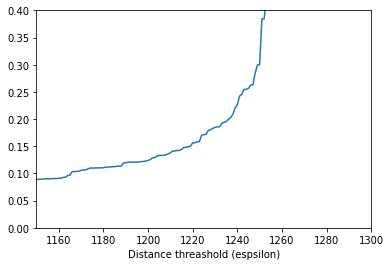

In [139]:
from sklearn.neighbors import NearestNeighbors
X = StandardScaler().fit_transform(principalDf)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.xlim(1150,1300)
plt.ylim(0,0.4)
plt.xlabel('Distances')
plt.xlabel('Distance threashold (espsilon)')
plt.plot(distances)
plt.show()

#### Run DBSCAN

In [140]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)

dimensions = ['Lat','Long','Tx','Tm','Tn']
dimensions_string = ", ".join(dimensions)
Clus_dataSet = df[dimensions]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

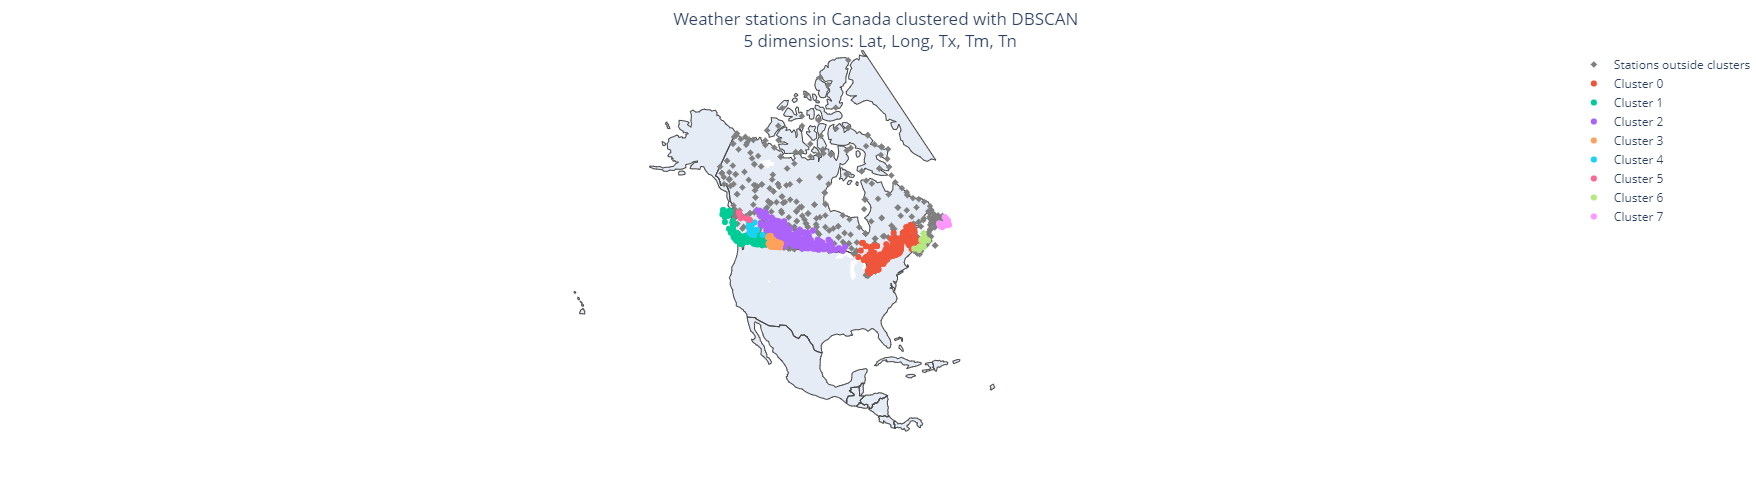

In [141]:
import plotly.graph_objects as go
import pandas as pd

df = df.sort_values('Clus_Db')

fig = go.Figure()

for C in list(df.Clus_Db.unique()):
    # Adding trace for outlier
    if C==-1:
        fig.add_trace(go.Scattergeo(
                        lat = df[df.Clus_Db == C]['Lat'],
                        lon = df[df.Clus_Db == C]['Long'],
                        name = 'Stations outside clusters',
                        marker = {'color' : 'grey','size': 5,'symbol': 'diamond'}
                                    )
                        )
        
    # Adding trace for clusters
    else:
        fig.add_trace(go.Scattergeo(
                        lat = df[df.Clus_Db == C]['Lat'],
                        lon = df[df.Clus_Db == C]['Long'],
                        name = 'Cluster ' + str(C))
                     )
    
fig.update_layout(width=800, height=500,
                  margin=dict(r=0, b=20, l=0, t=50),
                  title = {
                    'text': "Weather stations in Canada clustered with DBSCAN <br> {} dimensions: {}".format(len(dimensions),dimensions_string),
                     'y':0.95,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top' },
                 geo_scope='north america'
                 )

fig.show()